In [ ]:
from scipy.ndimage import binary_hit_or_miss


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.morphology import skeletonize


# Q1: Noise Reduction and Analysis

Saving Screenshot 2025-09-08 213040.png to Screenshot 2025-09-08 213040.png
Uploaded: Screenshot 2025-09-08 213040.png


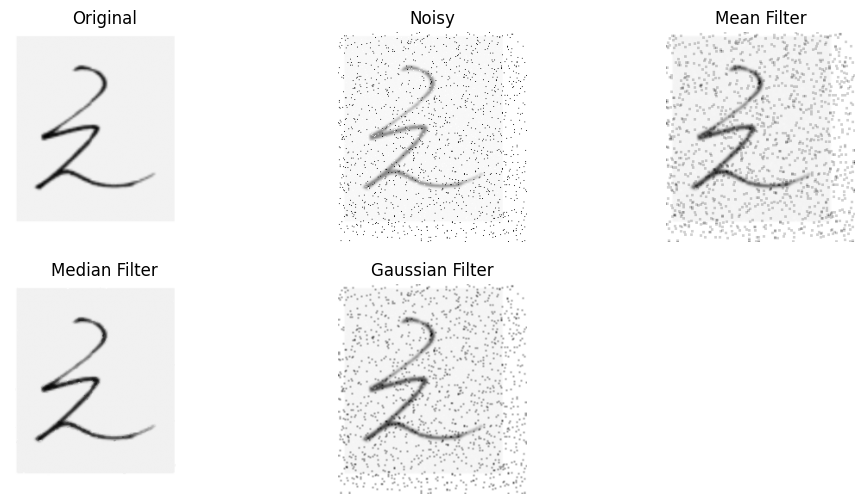

PSNR (Mean Filter): 25.20
PSNR (Median Filter): 46.30
PSNR (Gaussian Filter): 24.42


In [ ]:
# ====== Step 1: Imports ======
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# ====== Step 2: Image Upload (For Google Colab) ======
from google.colab import files
uploaded = files.upload()

# Get uploaded image filename
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ====== Step 3: Q1 Function ======
def q1_noise_reduction(img_path):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Add salt-and-pepper noise
    noisy = img.copy()
    prob = 0.05  # noise probability
    rnd = np.random.rand(*img.shape)
    noisy[rnd < prob/2] = 0
    noisy[rnd > 1 - prob/2] = 255

    # Apply filters
    mean_f = cv2.blur(noisy, (3, 3))
    median_f = cv2.medianBlur(noisy, 3)
    gaussian_f = cv2.GaussianBlur(noisy, (3, 3), 0)

    # Compute PSNR
    psnr_mean = psnr(img, mean_f)
    psnr_median = psnr(img, median_f)
    psnr_gaussian = psnr(img, gaussian_f)

    # Display results
    titles = ["Original", "Noisy", "Mean Filter", "Median Filter", "Gaussian Filter"]
    images = [img, noisy, mean_f, median_f, gaussian_f]

    plt.figure(figsize=(12,6))
    for i in range(len(images)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

    print(f"PSNR (Mean Filter): {psnr_mean:.2f}")
    print(f"PSNR (Median Filter): {psnr_median:.2f}")
    print(f"PSNR (Gaussian Filter): {psnr_gaussian:.2f}")

# ====== Step 4: Run Q1 ======
q1_noise_reduction(img_path)


In [ ]:
# Load grayscale or color image
img = cv2.imread(img_path)

# Print image shape
print("Image shape:", img.shape)

# If grayscale -> (height, width)
# If color -> (height, width, channels)

# Print width, height separately
h, w = img.shape[:2]
print("Width:", w, "Height:", h)


Image shape: (244, 219, 3)
Width: 219 Height: 244


Saving tamanna_sign.jpg to tamanna_sign.jpg
Uploaded: tamanna_sign.jpg


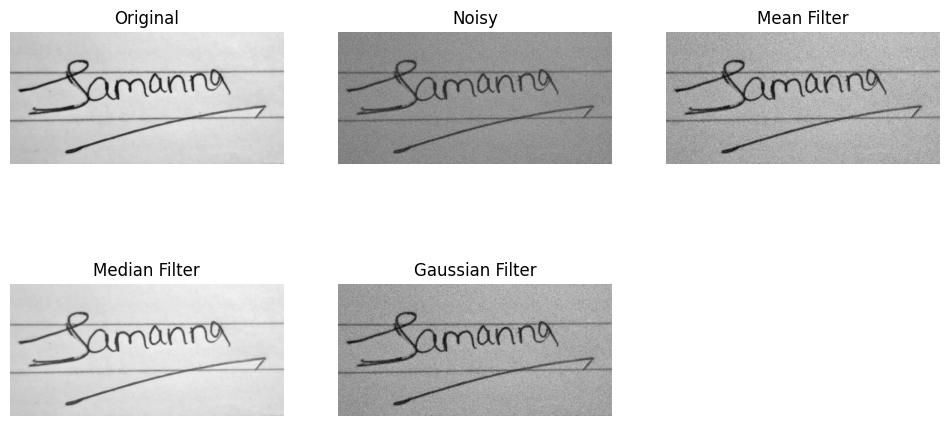

PSNR (Mean Filter): 28.30
PSNR (Median Filter): 50.18
PSNR (Gaussian Filter): 27.31


In [ ]:
# ====== Step 1: Imports ======
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# ====== Step 2: Image Upload (For Google Colab) ======
from google.colab import files
uploaded = files.upload()

# Get uploaded image filename
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ====== Step 3: Q1 Function ======
def q1_noise_reduction(img_path):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Add salt-and-pepper noise
    noisy = img.copy()
    prob = 0.05  # noise probability
    rnd = np.random.rand(*img.shape)
    noisy[rnd < prob/2] = 0
    noisy[rnd > 1 - prob/2] = 255

    # Apply filters
    mean_f = cv2.blur(noisy, (3, 3))
    median_f = cv2.medianBlur(noisy, 3)
    gaussian_f = cv2.GaussianBlur(noisy, (3, 3), 0)

    # Compute PSNR
    psnr_mean = psnr(img, mean_f)
    psnr_median = psnr(img, median_f)
    psnr_gaussian = psnr(img, gaussian_f)

    # Display results
    titles = ["Original", "Noisy", "Mean Filter", "Median Filter", "Gaussian Filter"]
    images = [img, noisy, mean_f, median_f, gaussian_f]

    plt.figure(figsize=(12,6))
    for i in range(len(images)):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

    print(f"PSNR (Mean Filter): {psnr_mean:.2f}")
    print(f"PSNR (Median Filter): {psnr_median:.2f}")
    print(f"PSNR (Gaussian Filter): {psnr_gaussian:.2f}")

# ====== Step 4: Run Q1 ======
q1_noise_reduction(img_path)


In [ ]:
# Load grayscale or color image
img = cv2.imread(img_path)

# Print image shape
print("Image shape:", img.shape)

# If grayscale -> (height, width)
# If color -> (height, width, channels)

# Print width, height separately
h, w = img.shape[:2]
print("Width:", w, "Height:", h)


Image shape: (686, 1417, 3)
Width: 1417 Height: 686


# Q2: Edge Enhancement and Analysis


Saving sign.png to sign (1).png
Uploaded: sign (1).png


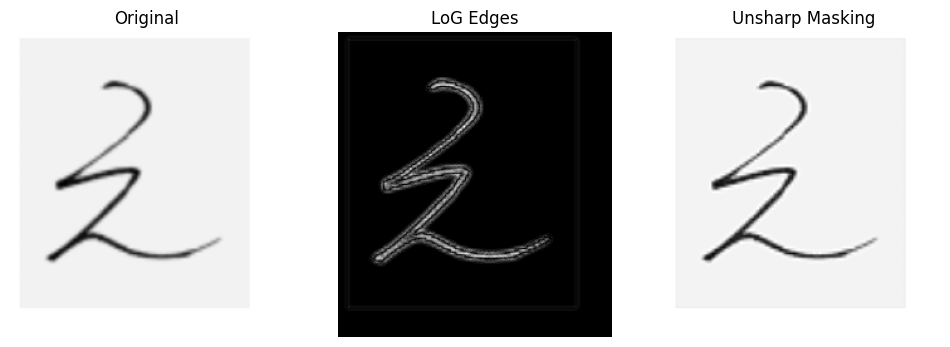

In [ ]:
# ====== Step 1: Imports ======
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# ====== Step 2: Upload Image ======
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ====== Step 3: Q2 Function ======
def q2_edge_enhancement(img_path, k=1.5):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # (a) Laplacian of Gaussian (LoG)
    log = cv2.GaussianBlur(img, (3,3), 0)   # smooth first
    log = cv2.Laplacian(log, cv2.CV_64F)    # apply Laplacian
    log = cv2.convertScaleAbs(log)          # convert for display

    # (b) Unsharp Masking
    blur = cv2.GaussianBlur(img, (5,5), 0)
    unsharp = cv2.addWeighted(img, 1 + k, blur, -k, 0)   # formula

    # Display results
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")
    plt.axis("off")
    plt.subplot(1,3,2), plt.imshow(log, cmap='gray'), plt.title("LoG Edges")
    plt.axis("off")
    plt.subplot(1,3,3), plt.imshow(unsharp, cmap='gray'), plt.title("Unsharp Masking")
    plt.axis("off")
    plt.show()

# ====== Step 4: Run Q2 ======
q2_edge_enhancement(img_path, k=1.5)


Saving tamanna_sign.jpg to tamanna_sign (1).jpg
Uploaded: tamanna_sign (1).jpg


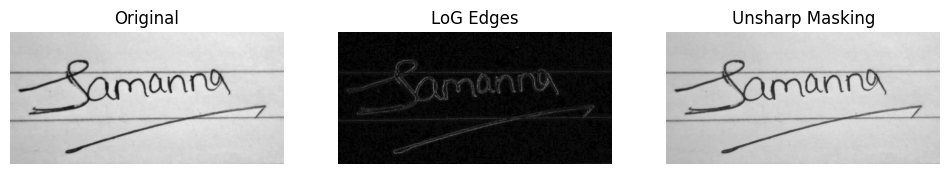

In [ ]:
# ====== Step 1: Imports ======
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# ====== Step 2: Upload Image ======
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ====== Step 3: Q2 Function ======
def q2_edge_enhancement(img_path, k=1.5):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # (a) Laplacian of Gaussian (LoG)
    log = cv2.GaussianBlur(img, (3,3), 0)   # smooth first
    log = cv2.Laplacian(log, cv2.CV_64F)    # apply Laplacian
    log = cv2.convertScaleAbs(log)          # convert for display

    # (b) Unsharp Masking
    blur = cv2.GaussianBlur(img, (5,5), 0)
    unsharp = cv2.addWeighted(img, 1 + k, blur, -k, 0)   # formula

    # Display results
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")
    plt.axis("off")
    plt.subplot(1,3,2), plt.imshow(log, cmap='gray'), plt.title("LoG Edges")
    plt.axis("off")
    plt.subplot(1,3,3), plt.imshow(unsharp, cmap='gray'), plt.title("Unsharp Masking")
    plt.axis("off")
    plt.show()

# ====== Step 4: Run Q2 ======
q2_edge_enhancement(img_path, k=1.5)


# Q3. Cell Segmentation and Analysis in Microscopic Images


Saving Screenshot 2025-09-08 213805.png to Screenshot 2025-09-08 213805 (1).png
Uploaded: Screenshot 2025-09-08 213805 (1).png


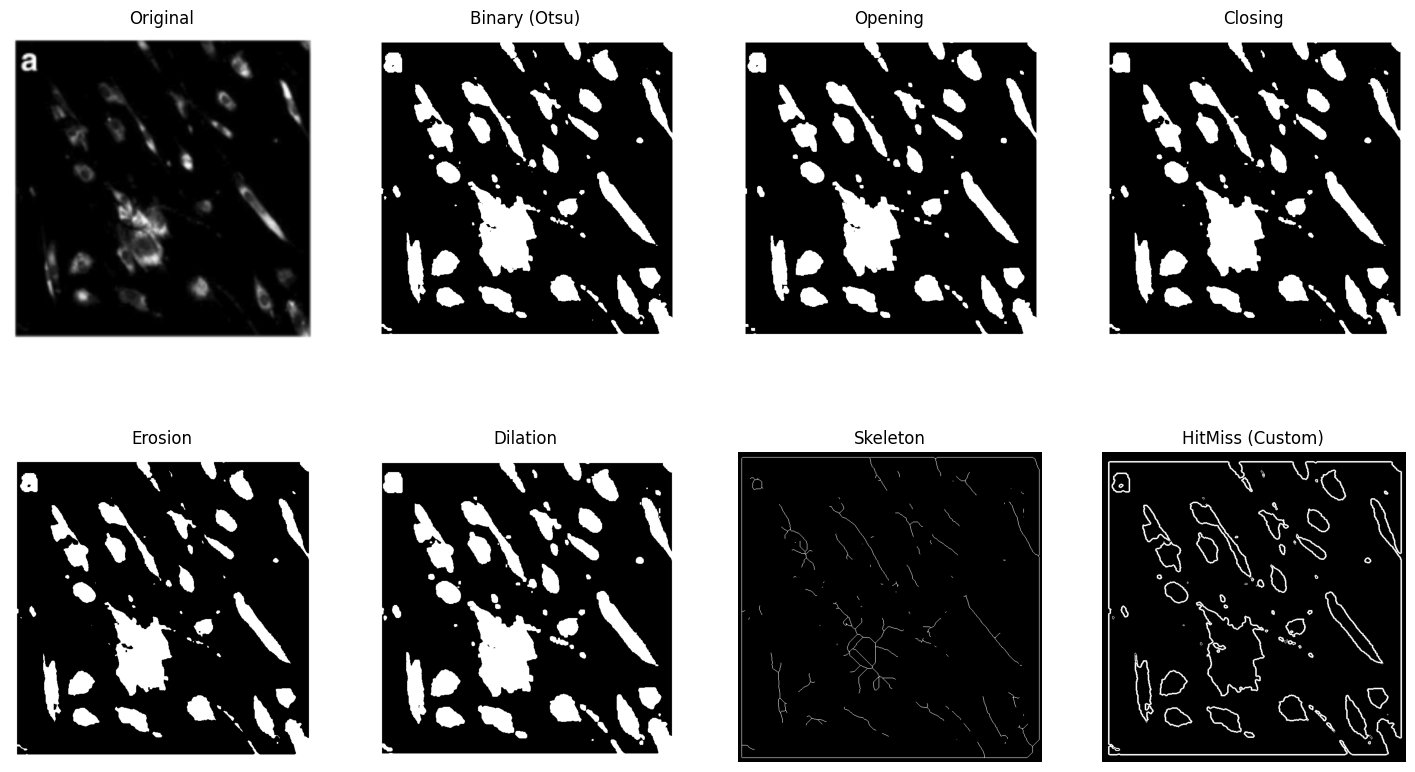

In [ ]:
# ===== Step 1: Imports =====
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# ===== Step 2: Upload Image =====
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ===== Step 3: Custom Hit-and-Miss Function =====
def hit_and_miss_custom(binary):
    results = []

    # Define circular kernels of different sizes
    kernels = [
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
    ]

    for k in kernels:
        # Erode with kernel (foreground match)
        fg = cv2.erode(binary, k)

        # Dilate to get background ring
        bg = cv2.dilate(fg, k)

        # Subtract to highlight matched circular pattern
        diff = cv2.subtract(bg, fg)
        results.append(diff)

    # Combine results from all kernel sizes
    combined = results[0]
    for r in results[1:]:
        combined = cv2.bitwise_or(combined, r)

    return combined

# ===== Step 4: Morphological Operations Demo =====
def morphological_demo(img_path):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Enhance contrast
    img_eq = cv2.equalizeHist(img)

    # Threshold (Otsu)
    _, binary = cv2.threshold(img_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Define kernel
    kernel = np.ones((3,3), np.uint8)

    # Opening: remove noise
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Closing: fill gaps
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Erosion: shrink objects
    erosion = cv2.erode(binary, kernel, iterations=1)

    # Dilation: expand objects
    dilation = cv2.dilate(binary, kernel, iterations=1)

    # Skeletonization (medial axis)
    skeleton = skeletonize(binary > 0)

    # Custom Hit-and-Miss
    hitmiss_custom = hit_and_miss_custom(binary)

    # Display results
    titles = ["Original", "Binary (Otsu)", "Opening", "Closing",
              "Erosion", "Dilation", "Skeleton", "HitMiss (Custom)"]
    images = [img, binary, opening, closing, erosion, dilation, skeleton, hitmiss_custom]

    plt.figure(figsize=(18,10))
    for i in range(len(images)):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# ===== Step 5: Run Demo =====
morphological_demo(img_path)


##

Saving Screenshot 2025-09-08 213854.png to Screenshot 2025-09-08 213854 (2).png
Uploaded: Screenshot 2025-09-08 213854 (2).png


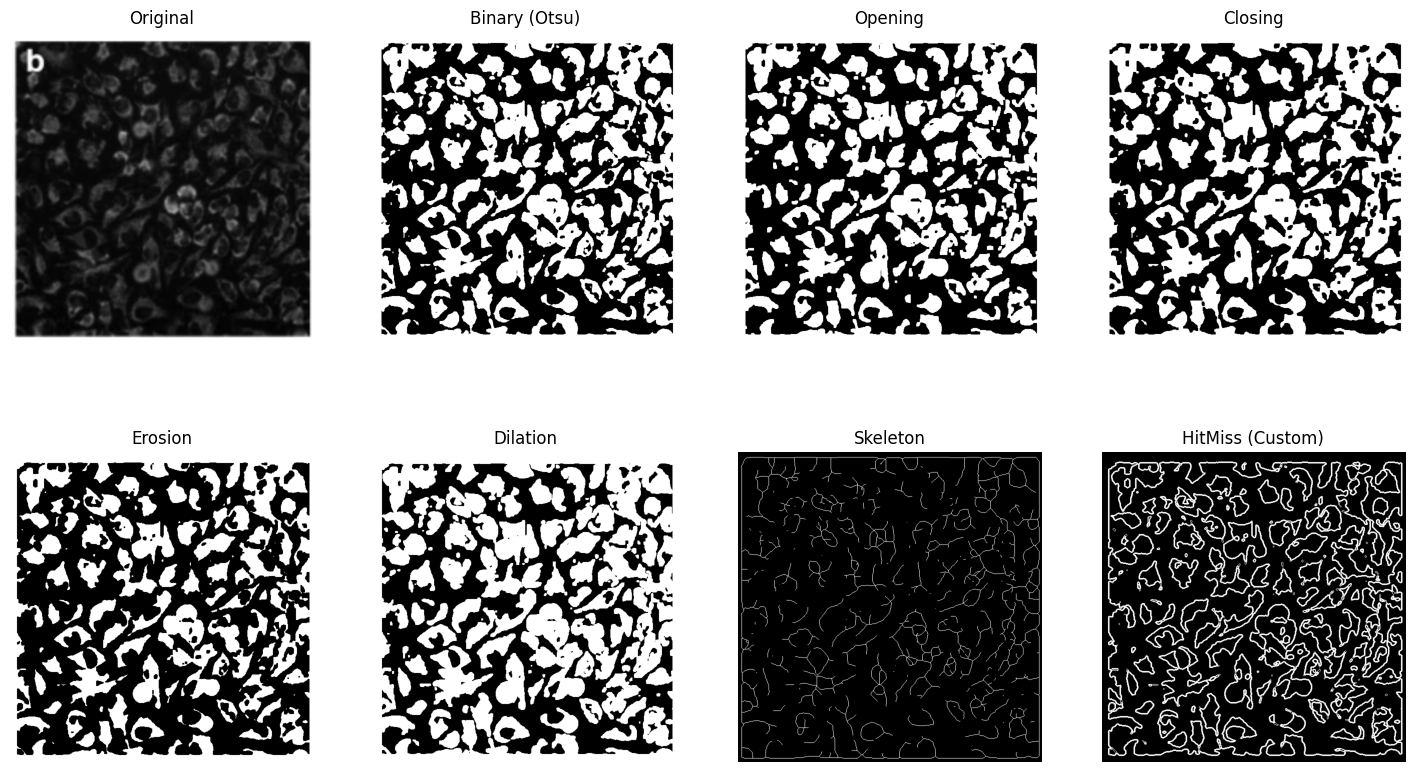

In [ ]:
# ===== Step 1: Imports =====
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# ===== Step 2: Upload Image =====
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ===== Step 3: Custom Hit-and-Miss Function =====
def hit_and_miss_custom(binary):
    results = []

    # Define circular kernels of different sizes
    kernels = [
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
    ]

    for k in kernels:
        # Erode with kernel (foreground match)
        fg = cv2.erode(binary, k)

        # Dilate to get background ring
        bg = cv2.dilate(fg, k)

        # Subtract to highlight matched circular pattern
        diff = cv2.subtract(bg, fg)
        results.append(diff)

    # Combine results from all kernel sizes
    combined = results[0]
    for r in results[1:]:
        combined = cv2.bitwise_or(combined, r)

    return combined

# ===== Step 4: Morphological Operations Demo =====
def morphological_demo(img_path):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Enhance contrast
    img_eq = cv2.equalizeHist(img)

    # Threshold (Otsu)
    _, binary = cv2.threshold(img_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Define kernel
    kernel = np.ones((3,3), np.uint8)

    # Opening: remove noise
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Closing: fill gaps
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Erosion: shrink objects
    erosion = cv2.erode(binary, kernel, iterations=1)

    # Dilation: expand objects
    dilation = cv2.dilate(binary, kernel, iterations=1)

    # Skeletonization (medial axis)
    skeleton = skeletonize(binary > 0)

    # Custom Hit-and-Miss
    hitmiss_custom = hit_and_miss_custom(binary)

    # Display results
    titles = ["Original", "Binary (Otsu)", "Opening", "Closing",
              "Erosion", "Dilation", "Skeleton", "HitMiss (Custom)"]
    images = [img, binary, opening, closing, erosion, dilation, skeleton, hitmiss_custom]

    plt.figure(figsize=(18,10))
    for i in range(len(images)):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# ===== Step 5: Run Demo =====
morphological_demo(img_path)


Saving Screenshot 2025-09-08 214128.png to Screenshot 2025-09-08 214128 (2).png
Uploaded: Screenshot 2025-09-08 214128 (2).png


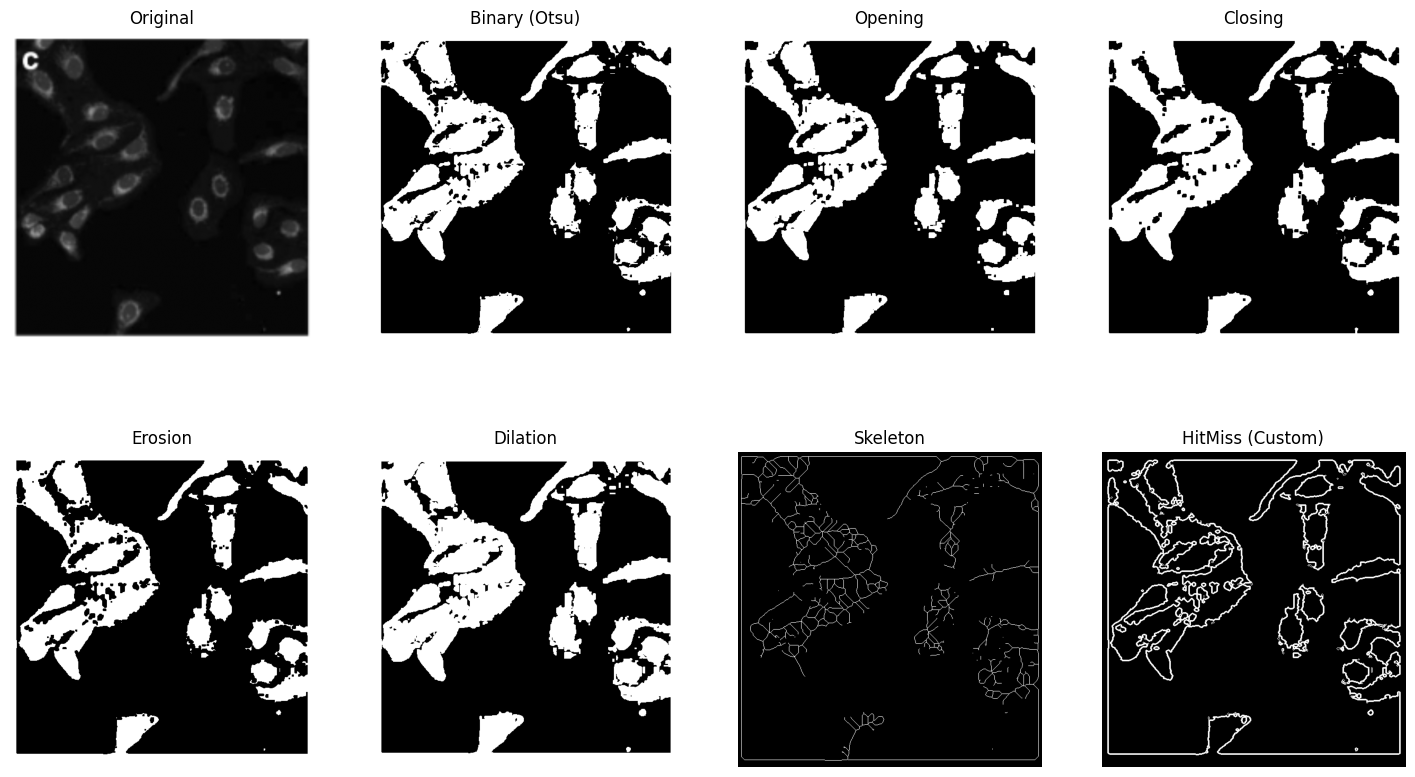

In [ ]:
# ===== Step 1: Imports =====
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# ===== Step 2: Upload Image =====
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ===== Step 3: Custom Hit-and-Miss Function =====
def hit_and_miss_custom(binary):
    results = []

    # Define circular kernels of different sizes
    kernels = [
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
    ]

    for k in kernels:
        # Erode with kernel (foreground match)
        fg = cv2.erode(binary, k)

        # Dilate to get background ring
        bg = cv2.dilate(fg, k)

        # Subtract to highlight matched circular pattern
        diff = cv2.subtract(bg, fg)
        results.append(diff)

    # Combine results from all kernel sizes
    combined = results[0]
    for r in results[1:]:
        combined = cv2.bitwise_or(combined, r)

    return combined

# ===== Step 4: Morphological Operations Demo =====
def morphological_demo(img_path):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Enhance contrast
    img_eq = cv2.equalizeHist(img)

    # Threshold (Otsu)
    _, binary = cv2.threshold(img_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Define kernel
    kernel = np.ones((3,3), np.uint8)

    # Opening: remove noise
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Closing: fill gaps
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Erosion: shrink objects
    erosion = cv2.erode(binary, kernel, iterations=1)

    # Dilation: expand objects
    dilation = cv2.dilate(binary, kernel, iterations=1)

    # Skeletonization (medial axis)
    skeleton = skeletonize(binary > 0)

    # Custom Hit-and-Miss
    hitmiss_custom = hit_and_miss_custom(binary)

    # Display results
    titles = ["Original", "Binary (Otsu)", "Opening", "Closing",
              "Erosion", "Dilation", "Skeleton", "HitMiss (Custom)"]
    images = [img, binary, opening, closing, erosion, dilation, skeleton, hitmiss_custom]

    plt.figure(figsize=(18,10))
    for i in range(len(images)):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# ===== Step 5: Run Demo =====
morphological_demo(img_path)


Saving Screenshot 2025-09-08 214154.png to Screenshot 2025-09-08 214154 (5).png
Uploaded: Screenshot 2025-09-08 214154 (5).png


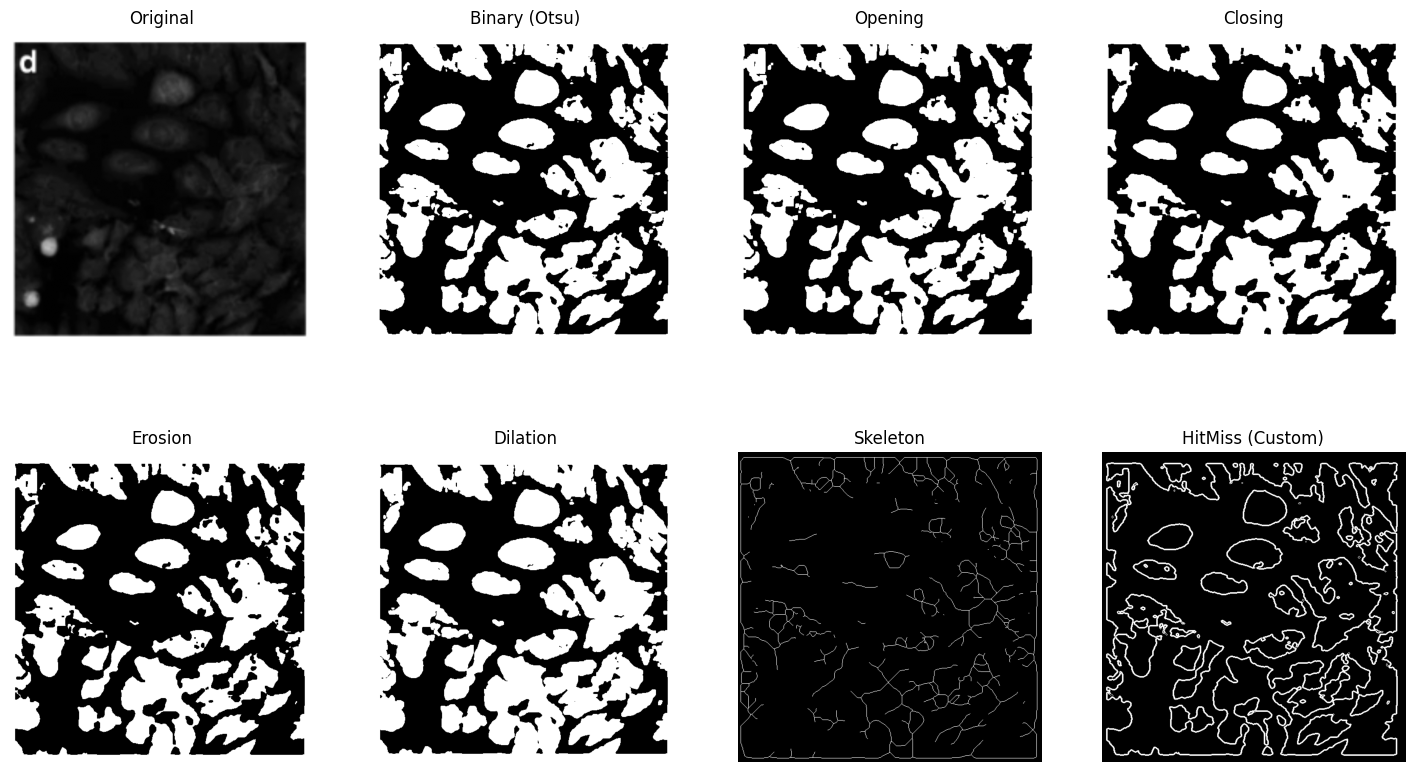

In [ ]:
# ===== Step 1: Imports =====
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from google.colab import files

# ===== Step 2: Upload Image =====
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# ===== Step 3: Custom Hit-and-Miss Function =====
def hit_and_miss_custom(binary):
    results = []

    # Define circular kernels of different sizes
    kernels = [
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
        cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
    ]

    for k in kernels:
        # Erode with kernel (foreground match)
        fg = cv2.erode(binary, k)

        # Dilate to get background ring
        bg = cv2.dilate(fg, k)

        # Subtract to highlight matched circular pattern
        diff = cv2.subtract(bg, fg)
        results.append(diff)

    # Combine results from all kernel sizes
    combined = results[0]
    for r in results[1:]:
        combined = cv2.bitwise_or(combined, r)

    return combined

# ===== Step 4: Morphological Operations Demo =====
def morphological_demo(img_path):
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Enhance contrast
    img_eq = cv2.equalizeHist(img)

    # Threshold (Otsu)
    _, binary = cv2.threshold(img_eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Define kernel
    kernel = np.ones((3,3), np.uint8)

    # Opening: remove noise
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Closing: fill gaps
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Erosion: shrink objects
    erosion = cv2.erode(binary, kernel, iterations=1)

    # Dilation: expand objects
    dilation = cv2.dilate(binary, kernel, iterations=1)

    # Skeletonization (medial axis)
    skeleton = skeletonize(binary > 0)

    # Custom Hit-and-Miss
    hitmiss_custom = hit_and_miss_custom(binary)

    # Display results
    titles = ["Original", "Binary (Otsu)", "Opening", "Closing",
              "Erosion", "Dilation", "Skeleton", "HitMiss (Custom)"]
    images = [img, binary, opening, closing, erosion, dilation, skeleton, hitmiss_custom]

    plt.figure(figsize=(18,10))
    for i in range(len(images)):
        plt.subplot(2,4,i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")
    plt.show()

# ===== Step 5: Run Demo =====
morphological_demo(img_path)


| Thresholding Method       | Before Processing | After Processing | Insight                                                                                                                                                                                            |
| ------------------------- | ----------------- | ---------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Otsu Thresholding**     | 1 cell            | 1 cell           | Otsu used a **global threshold**, so only one very bright region was detected. The rest of the cells weren’t bright enough compared to the global cutoff.                                          |
| **Adaptive Thresholding** | 1 cell            | 40 cells         | Adaptive works on **local contrast** (per image region), so it correctly segmented many cells even if brightness varies. Morphological steps improved structure, leading to **40 detected cells**. |


## Use Adaptive Thresholding for images with uneven illumination (like microscopy images).

## Otsu is best for uniform lighting images or high-contrast datasets.

## Morphological operations greatly improved segmentation accuracy by removing noise and consolidating true cell shapes.